### Step 1
* Imports

In [1]:
import numpy
import cv2
from matplotlib import pyplot

### Step 2
* Setup capture from video file

Video captured. Width 1280. Height 720.


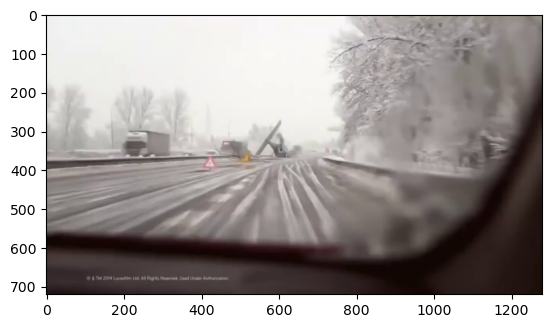

In [2]:
cap = cv2.VideoCapture('../data/1513181187.mp4')
ret, frame = cap.read()
if ret:
    print(f'Video captured. Width {frame.shape[1]}. Height {frame.shape[0]}.')
else:
    print(f'Error openen video.')
pyplot.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
pyplot.show()

### Step 3
* Defined start box for tracking

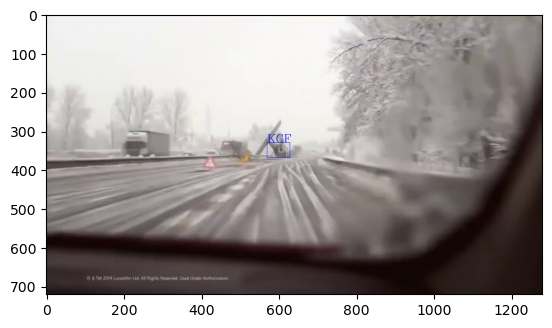

In [3]:
blue_box = (570, 330, 60, 40)
gren_box = (570, 330, 60, 40)
red_box = (570, 330, 60, 40)

def show_frame_with_box(img: numpy.ndarray, boxb=None, boxg=None, boxr=None) -> None:
    tmp_img = img.copy()
    if boxb is not None:
        cv2.putText(img=tmp_img, text='KCF', org=(boxb[0], boxb[1]), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=1.0, color=(255, 0, 0), thickness=1)
        cv2.rectangle(img=tmp_img, rec=boxb, color=(255, 0, 0), thickness=1)
    if boxg is not None:
        cv2.putText(img=tmp_img, text='CSRT', org=(boxg[0], boxg[1]), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=1.0, color=(0, 255, 0), thickness=1)
        cv2.rectangle(img=tmp_img, rec=boxg, color=(0, 255, 0), thickness=1)
    if boxr is not None:
        cv2.putText(img=tmp_img, text='MIL', org=(boxr[0], boxr[1]), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=1.0, color=(0, 0, 255), thickness=1)
        cv2.rectangle(img=tmp_img, rec=boxr, color=(0, 0, 255), thickness=1)
    cv2.imshow('Frame', tmp_img)
    return tmp_img

pyplot.imshow(cv2.cvtColor(show_frame_with_box(frame, blue_box), cv2.COLOR_BGR2RGB))
cv2.destroyAllWindows()
pyplot.show()

### Step 4
* Tracker init

In [4]:
tracker_KCF = cv2.TrackerKCF_create()
tracker_CSRT = cv2.TrackerCSRT_create()
tracker_MIL = cv2.TrackerMIL_create()

ok_KCF = tracker_KCF.init(frame, blue_box)
ok_CSRT = tracker_CSRT.init(frame, gren_box)
ok_MIL =tracker_MIL.init(frame, red_box)

def update_KCF():
    global blue_box
    ok, blue_box = tracker_KCF.update(frame)
    return ok

def update_CSRT():
    global green_box
    ok, green_box = tracker_CSRT.update(frame)
    return ok

def update_MIL():
    global red_box
    ok, red_box = tracker_MIL.update(frame)
    return ok

### Step 5
* Tracking loop

In [5]:

while True:
    ret, frame = cap.read()
    if not ret:
        break
    if not update_KCF():
        blue_box = None
    if not update_CSRT():
        green_box = None
    if not update_MIL():
        red_box = None
    show_frame_with_box(frame, blue_box, green_box, red_box)
    cv2.waitKey(5)
cv2.destroyAllWindows()


### Conclusion
* MIL
1) Robust for scale.
2) Not deteted if object is out.
3) Auto centring to center of original object.
* KCF
1) Robust for none zooming objects.
2) Return "False" for lost object.
3) Not robust for zooming.
* CSTR
1) Robust for scale. Changing size inner box for zooming objects.
2) Not deteted if object is out.
3) Robust for zooming.

### Висновок
* MIL
1) Надійний для масштабу.
2) Не визначається, якщо об’єкт вийшов.
3) Автоматичне центрування по центру оригінального об'єкта.
* KCF
1) Надійний для об’єктів, які не масштабуються.
2) Повертає "False" для втраченого об'єкта.
3) Не надійний для масштабування.
* CSTR
1) Надійний для масштабу. Зміна розміру внутрішнього поля для масштабування об'єктів.
2) Не визначається, якщо об’єкт вийшов.
3) Надійний для масштабування.